# Car Price Prediction Assignment

In [1]:
#import warnings 
#warning.filterwarings('ignore')

#libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# improting csv file

In [2]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [4]:
car.shape

(205, 26)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

# Data cleaning and preparation

In [6]:
car.duplicated(subset = ['car_ID']).sum()

0

In [7]:
car = car.drop(['car_ID'], axis = 1)

In [8]:
car.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
car['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

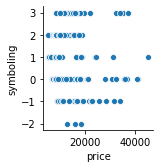

In [10]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price',data = car)

In [11]:
#checking column carName
car['CarName'].value_counts()

peugeot 504                 6
toyota corona               6
toyota corolla              6
subaru dl                   4
mitsubishi g4               3
                           ..
mitsubishi lancer           1
toyota corona mark ii       1
audi 5000s (diesel)         1
buick electra 225 custom    1
dodge coronet custom        1
Name: CarName, Length: 147, dtype: int64

# spliting car_company from carName column

In [12]:

car['car_company'] = car['CarName'].apply(lambda x : x.split(' ')[0])
car.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


# deleting the original column

In [13]:
car = car.drop(['CarName'],axis = 1)

In [14]:
car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
car['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
renault         2
vw              2
mercury         1
toyouta         1
vokswagen       1
porcshce        1
Nissan          1
Name: car_company, dtype: int64

In [16]:
car['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

# Fixing the invalid 

In [17]:
# There seem to be  spelling error in  car_company cloumn
car['car_company'].replace('toyouta','toyota', inplace = True)
car['car_company'].replace('maxda','mazda', inplace = True)
car['car_company'].replace('Nissan','nissan', inplace = True)
car['car_company'].replace('porcshce','porsche', inplace = True)
car['car_company'].replace('vokswagen','volkswagen', inplace = True)
car['car_company'].replace('vw','volkswagen', inplace = True)

In [18]:
car['car_company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [19]:
car['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: car_company, dtype: int64

In [20]:
car.loc[car.duplicated()]

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company


In [21]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'car_company'],
      dtype='object')

In [22]:
#checking the correlation of the model
car.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


In [23]:
#checking fueltype 
car['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [24]:
#checking Aspiration used in car

car['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [25]:
#checking doornumber in a car
car['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

# converting the string into numeric form as shown in the doornumber 

In [26]:
def dnumber(door):
    return door.map({'four':4,'two':2})
car['doornumber'] = car[['doornumber']].apply(dnumber)

In [27]:
#rechecking the doornumber of a car

car['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [28]:
#checking  type of drivewheel 
car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [29]:
#checking enginelocation (location of engine)
car['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [30]:
#checking carbody
car['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [31]:
#checking wheelbase of a car
car['wheelbase'].value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
98.4      7
97.3      7
96.3      6
107.9     6
98.8      6
99.1      6
104.3     6
100.4     6
93.1      5
97.2      5
102.4     5
109.1     5
95.9      5
101.2     4
97.0      4
114.2     4
95.3      4
105.8     3
103.5     3
110.0     3
89.5      3
99.8      2
86.6      2
113.0     2
104.5     2
104.9     2
88.6      2
96.9      2
91.3      2
115.6     2
102.9     2
96.1      2
103.3     2
112.0     1
99.5      1
88.4      1
99.2      1
96.0      1
102.0     1
106.7     1
93.0      1
99.4      1
93.3      1
102.7     1
120.9     1
95.1      1
96.6      1
94.3      1
108.0     1
Name: wheelbase, dtype: int64

In [32]:
# checking enginetye of a car
car['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [33]:
# checking cylinder number
car['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [34]:
#coverting  the string value into the numeric form

def cnumber(cn):
    return cn.map({'four':4,'six':6,'five':5,'eight':8,'two':2,'three':3,'twelve':1})
car['cylindernumber'] = car[['cylindernumber']].apply(cnumber)

In [35]:
# Rechecking the cylindernumber
car['cylindernumber'].value_counts()

4    159
6     24
5     11
8      5
2      4
3      1
1      1
Name: cylindernumber, dtype: int64

In [36]:
#checkinng the size of engine
car['enginesize'].value_counts().head()

122    15
92     15
98     14
97     14
108    13
Name: enginesize, dtype: int64

In [37]:
# Checking carwidth (width of the car)
car['carwidth'].value_counts().head()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
Name: carwidth, dtype: int64

In [38]:
# Checking the curbweight(the weight of a car without occupants or baggage.)
car['curbweight'].value_counts().head()

2385    4
1989    3
1918    3
2275    3
3230    2
Name: curbweight, dtype: int64

In [39]:
# Checking horsepower of the car
car['horsepower'].value_counts().head()

68     19
70     11
69     10
116     9
110     8
Name: horsepower, dtype: int64

In [40]:
# Checking the fuelsystem of the car
car['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuelsystem, dtype: int64

In [41]:
# Checking the length of the car
car['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

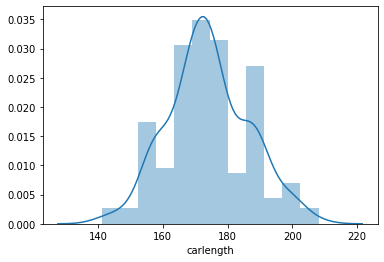

In [42]:
sns.distplot(car['carlength'])

In [43]:
# Checking the wheelbase of the car
car['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

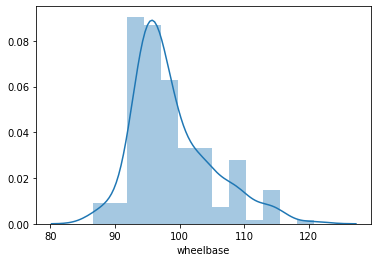

In [44]:
sns.distplot(car['wheelbase'])

# Visualising the data

In [45]:
car_num = car.select_dtypes(include = ['int64','float64'])
car_num.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


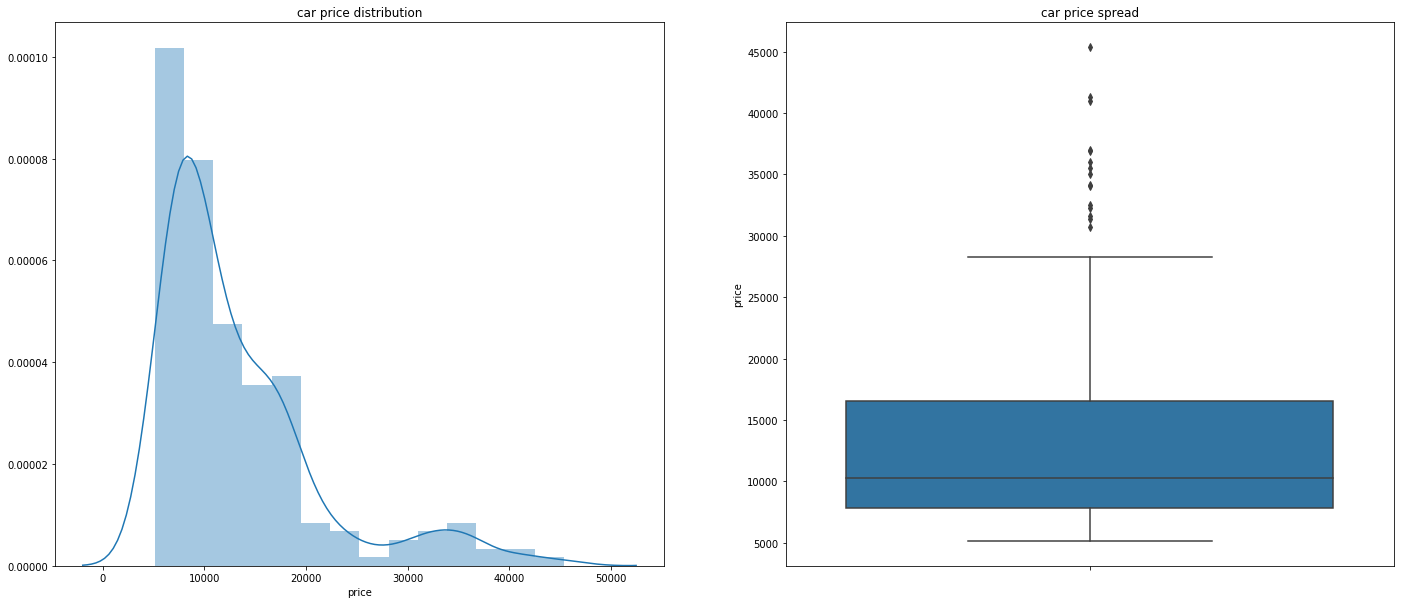

In [46]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
plt.title('car price distribution')
sns.distplot(car['price'])

plt.subplot(1,2,2)
plt.title('car price spread')
sns.boxplot(y = car['price'])

plt.show()

<Figure size 1728x1728 with 0 Axes>

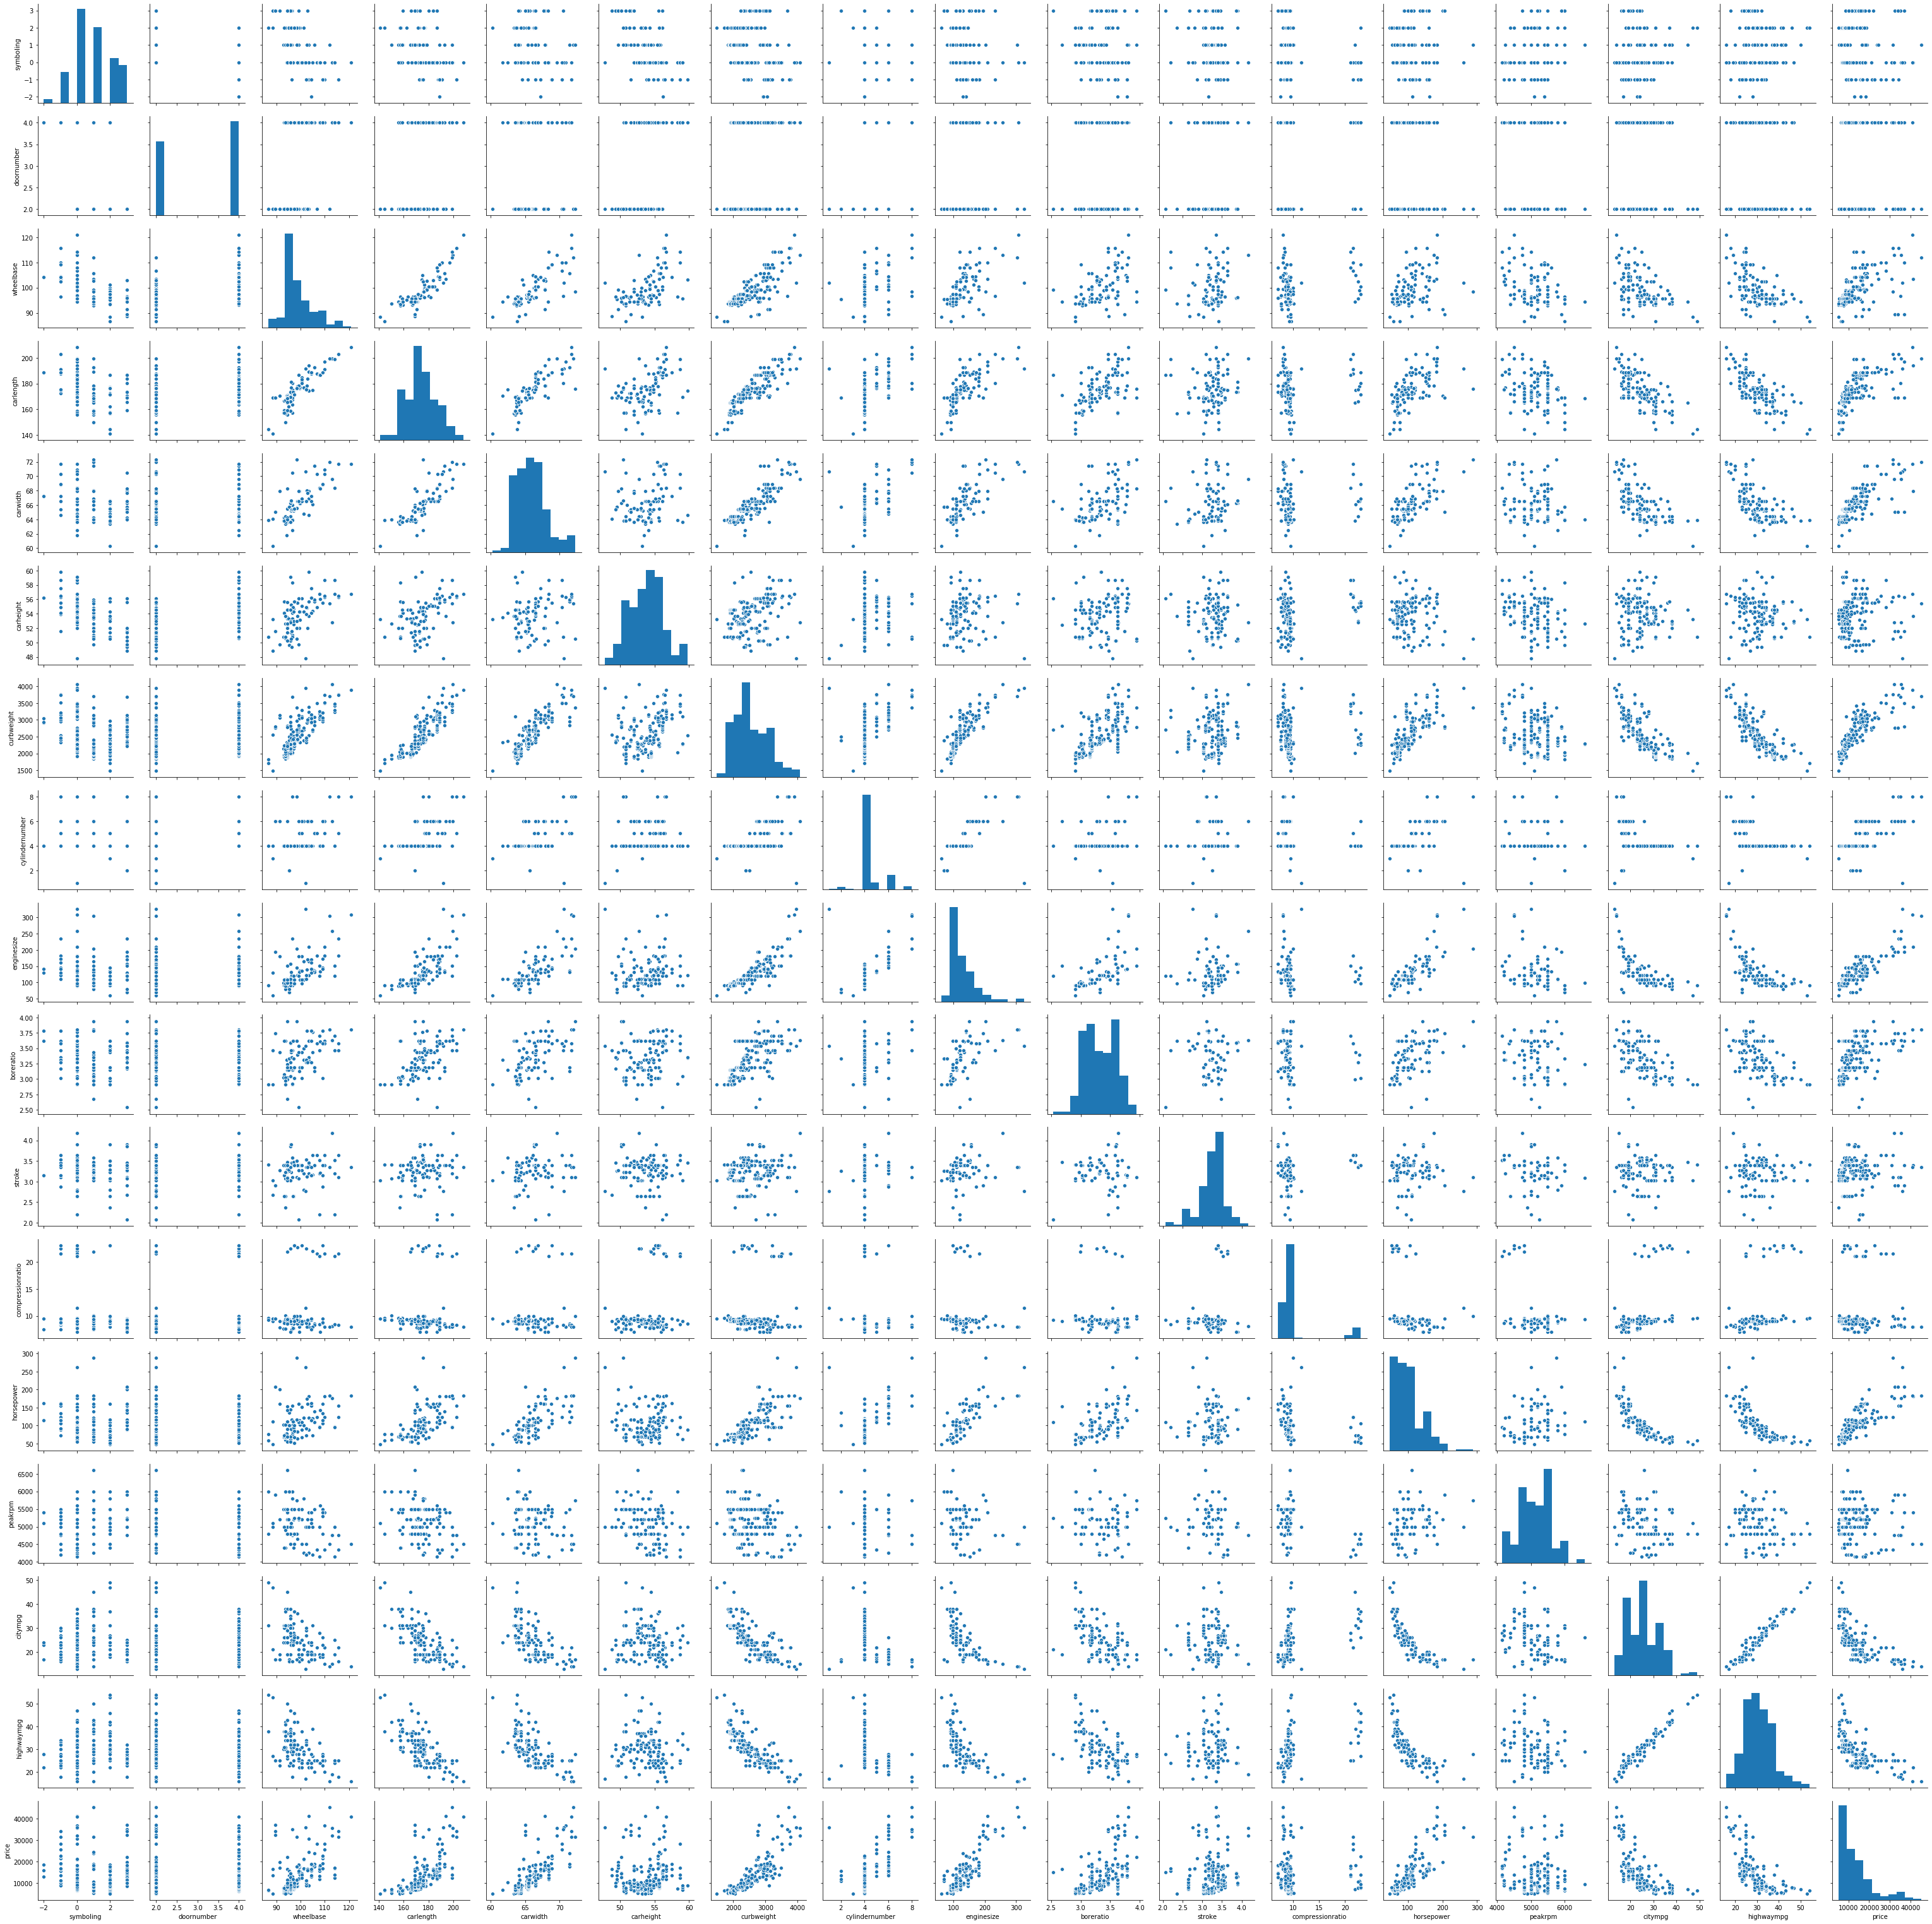

In [47]:
plt.figure(figsize=(24,24))
sns.pairplot(car_num)
plt.show()

# In the above graph lot of columns we can't predict the suitable column so lets checks the correlation using heatmap

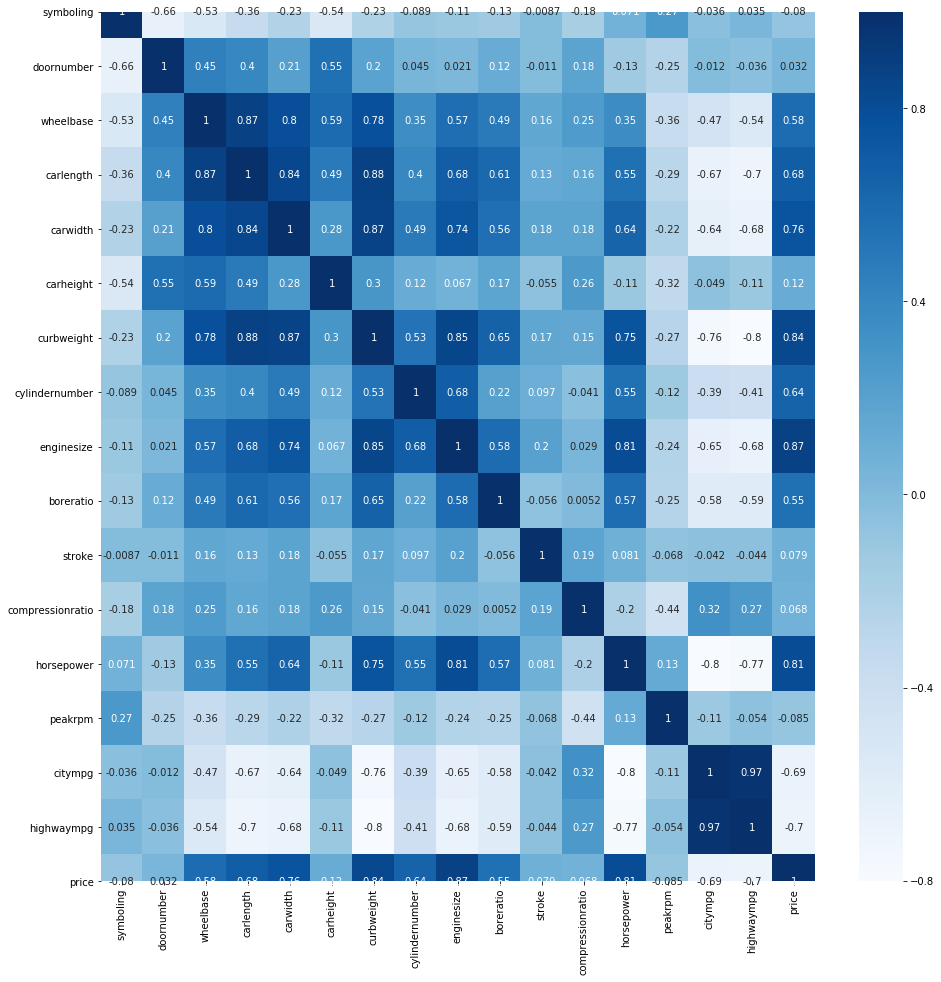

In [48]:
plt.figure(figsize = (16,16))
sns.heatmap(car.corr(), annot = True, cmap='Blues')
plt.show()

In [49]:
print(car['price'].describe(percentiles =[0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


CONCLUSION:
    1. In the subpot graph the plot seemed to be right-skewed i.e most of the price values below (15000).
    2. There are the significant difference between the mean and the median of the price  distribution.
    3. 85% of the prices are  below from 18500 whereas the remaining 15% price are between 18500 and 45500.
    4. Price is  highly positively correlated  with carwidth,curbweight,enginesize,horsepower etc.
    5. Price is negatively correlated with symboling, citympg, peakmpg and highwaympg.
    6. The cars having high mileage may fall in the  economy.
    7. There are many independent variable which are highly correlated.
    

# Visualising the Categorical Data 

In [50]:
c_cols = car.select_dtypes(include = ['object'])
c_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


G:\PYTHON\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.
G:\PYTHON\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  # Remove the CWD from sys.path while we load stuff.
G:\PYTHON\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  app.launch_new_instance()


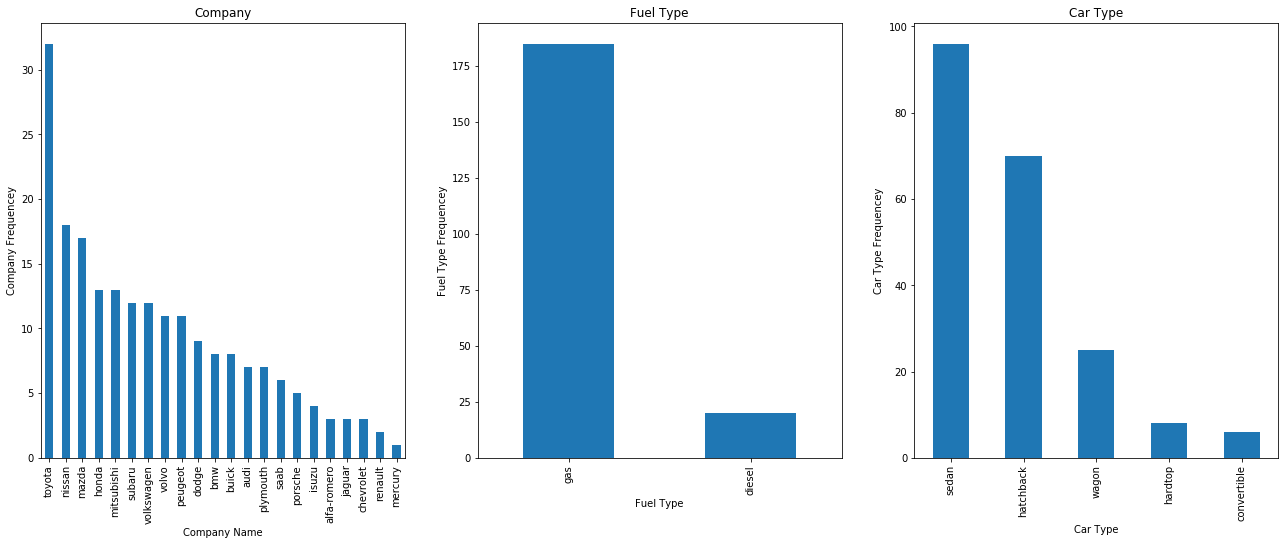

In [51]:
plt.figure(figsize = (30,8))

plt.subplot(1,4,1)
pltt = car['car_company'].value_counts().plot('bar')
plt.title('Company')
pltt.set(xlabel = 'Company Name', ylabel  = 'Company Frequencey')


plt.subplot(1,4,2)
pltt = car['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
pltt.set(xlabel = 'Fuel Type', ylabel  = 'Fuel Type Frequencey')


plt.subplot(1,4,3)
pltt = car['carbody'].value_counts().plot('bar')
plt.title('Car Type')
pltt.set(xlabel = 'Car Type', ylabel  = 'Car Type Frequencey')

plt.show()


CONCLUSION:
        1. toyota is highly favored company.
        2. gas fueled cars are more then diesel.
        3. sedan is the most preferable car. 

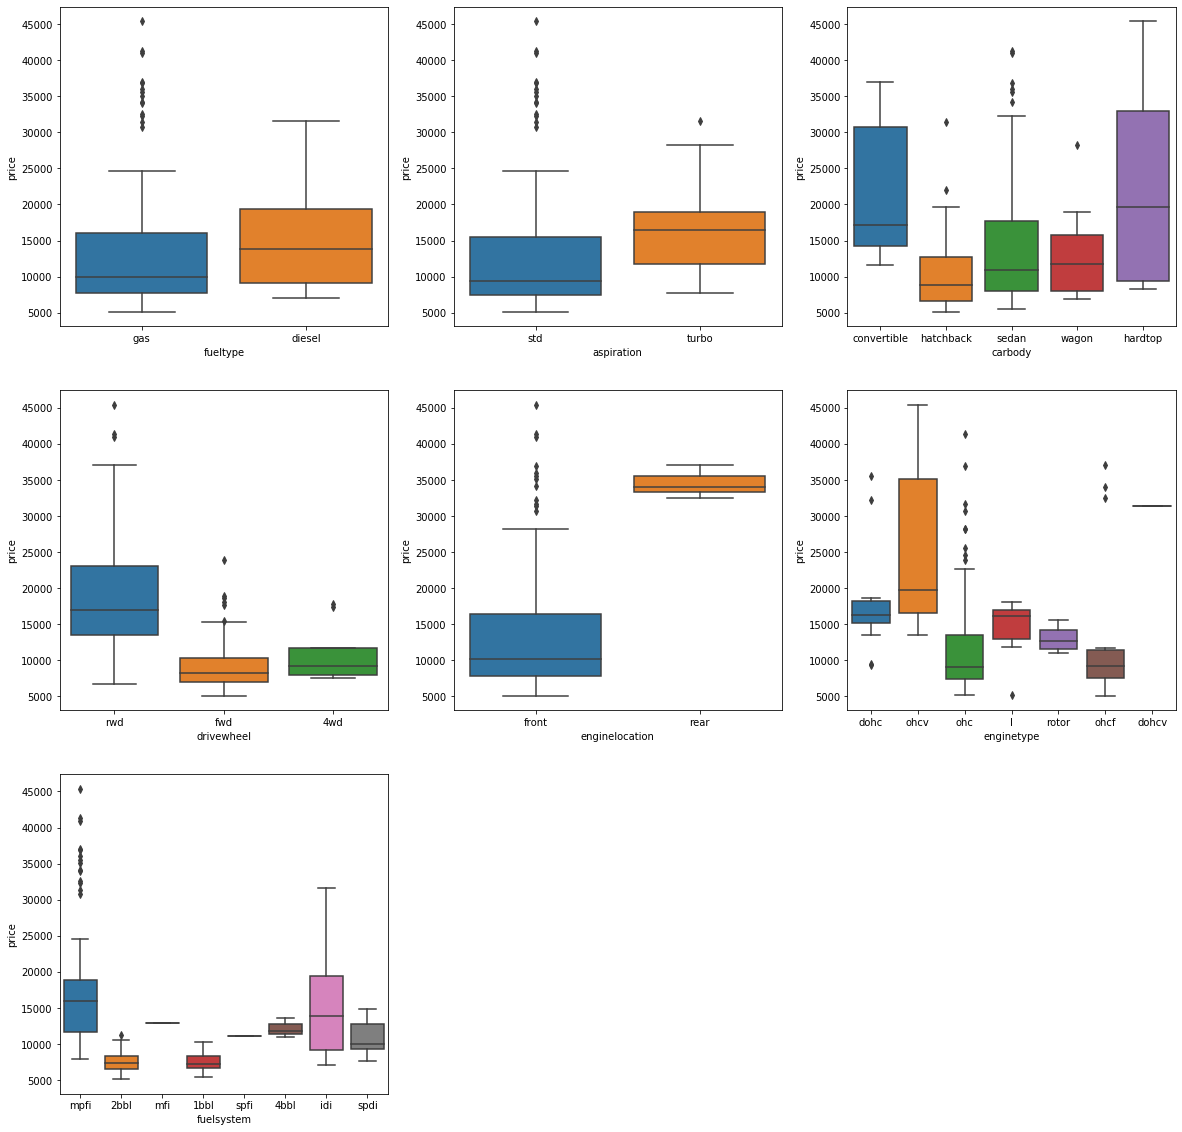

In [52]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)

plt.show()

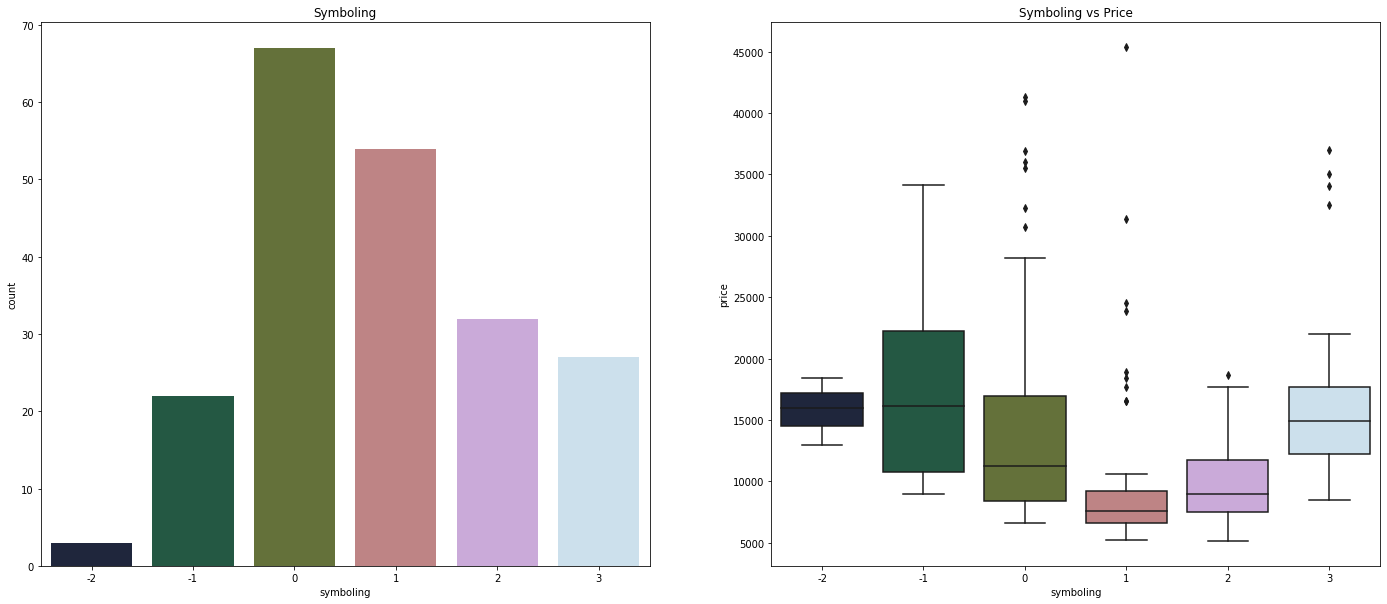

In [53]:
plt.figure(figsize=(24,10))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(car.symboling, palette=("cubehelix"))


plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=car.symboling, y=car.price, palette=("cubehelix"))

plt.show()

CONCLUSION:
        1. symboling with 0 and 1 vlues have high number of rows i.e most of sold.
        2. symboling -1 is high priced(risk rate is quit good)

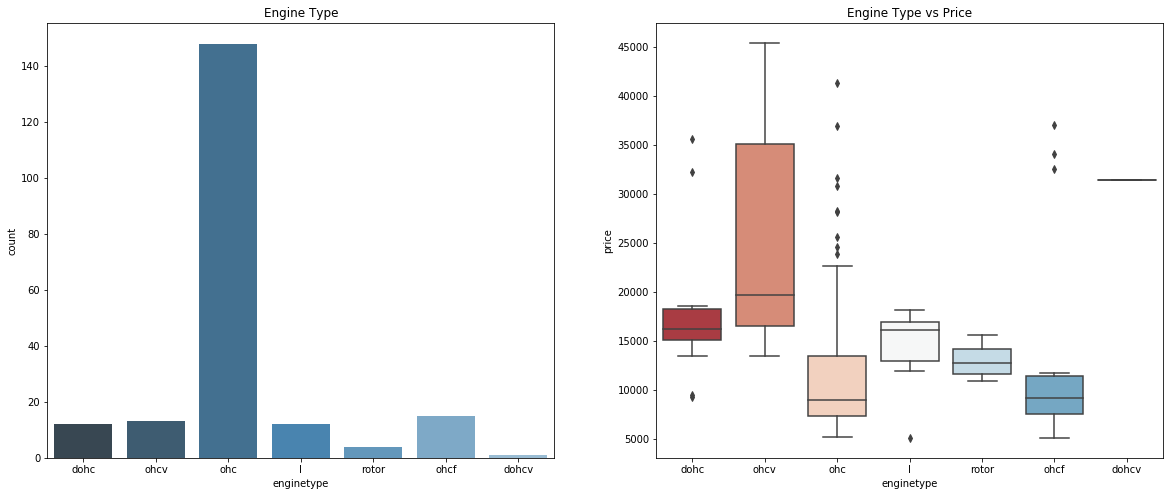

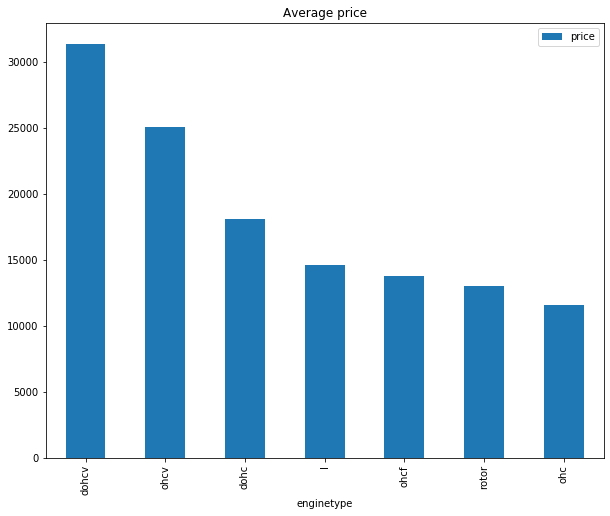

In [54]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(car['enginetype'], palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=car['enginetype'],y=car['price'], palette=("RdBu"))

plt.show()

df = pd.DataFrame(car.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize =(10,8))
plt.title("Average price")
plt.show()

CONCLUSION:
        1. ohc is most favored engine type.
        2 ohc and ohcf is the lowest price range.

<Figure size 1800x576 with 0 Axes>

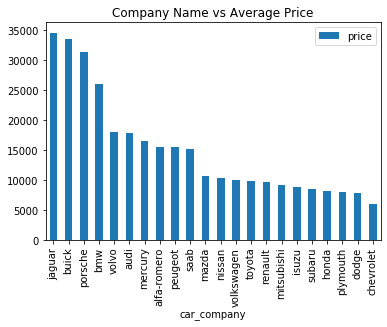

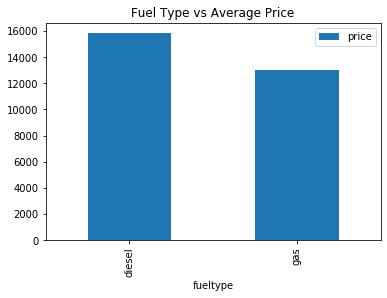

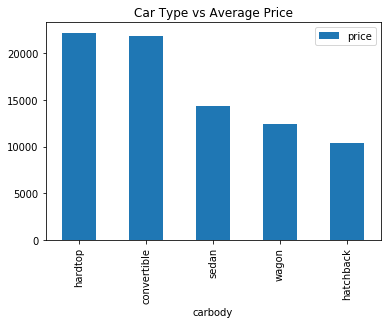

In [55]:

plt.figure(figsize = (25,8))

df = pd.DataFrame(car.groupby(['car_company'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(car.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(car.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

CONCLUSION:
        1. Jaguar,Buick and Porsche seem to have highest price.
        2. diesel has higher average price than gas.
        3. hardtop and convertible have higher average price than sedan,wagon and hatchback.

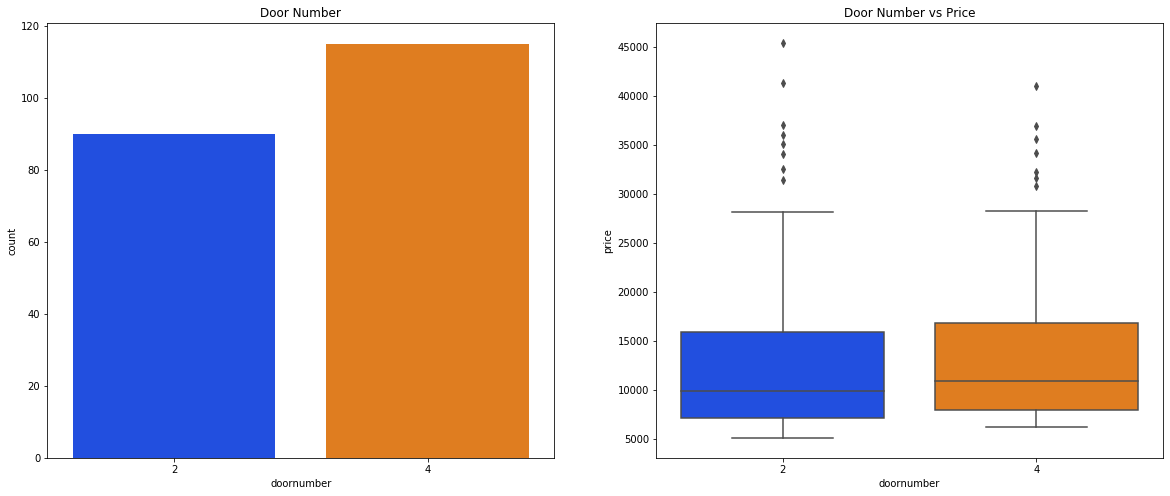

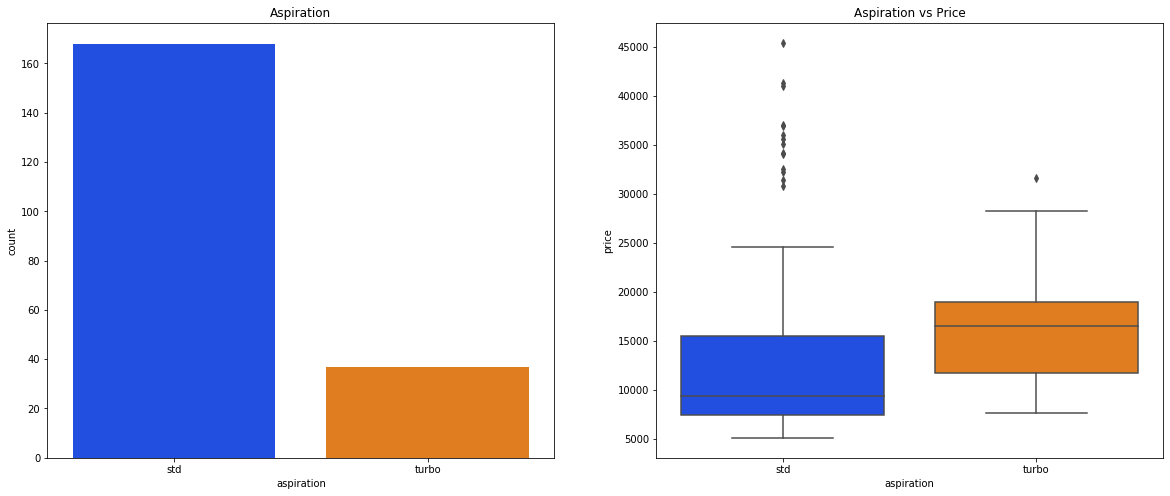

In [56]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(car['doornumber'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=car['doornumber'], y=car['price'], palette=("bright"))

plt.show()

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(car['aspiration'], palette=("bright"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=car['aspiration'], y=car['price'], palette=("bright"))

plt.show()


CONCLUSION:
        1. Doornumber vairable not affecting the price nuch.there is significant difference between them.
        2. std is less price than the turbo.

 # Visualising numerical data 

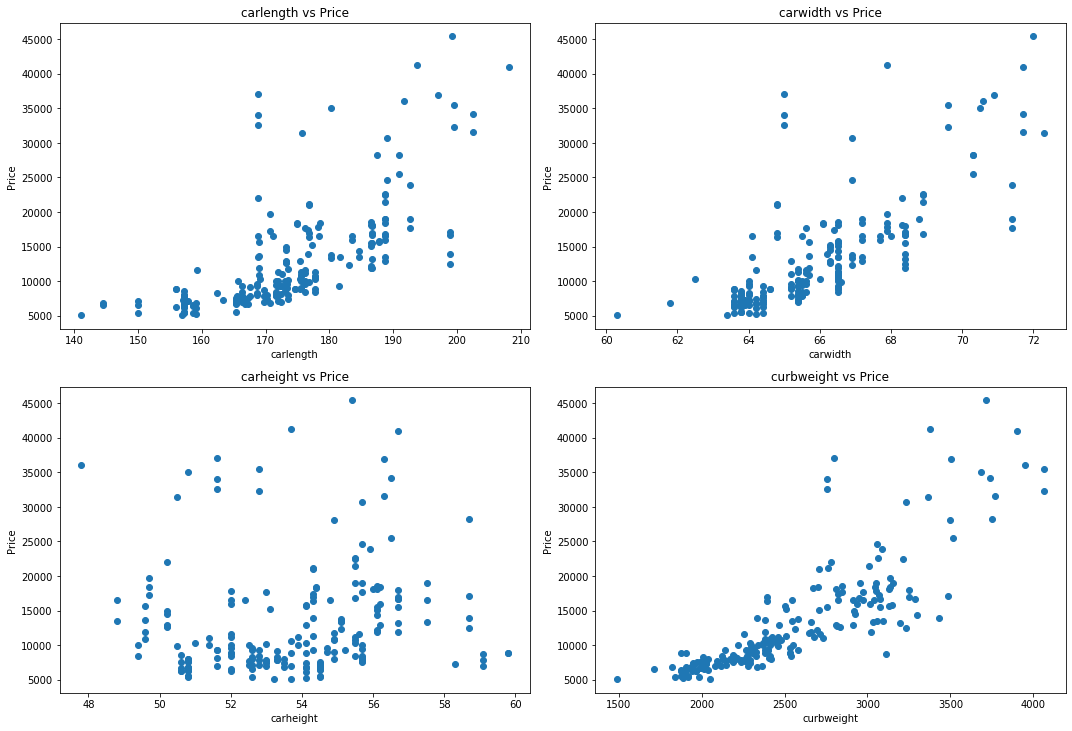

In [57]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car[x],car['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(15,25))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

CONCLUSION:
        1. carlength, carwidth and curbweight seem to have highely positively correlation with price.
        2. carheight doesn't have any significant with price.

#  Bivariate analysis

<Figure size 864x576 with 0 Axes>

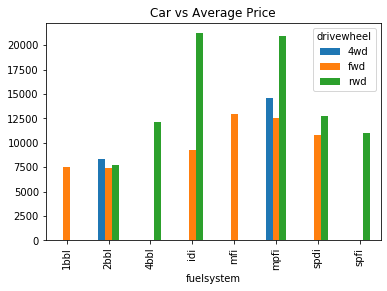

In [58]:
plt.figure(figsize=(12,8))

df = pd.DataFrame(car.groupby(['fuelsystem','drivewheel'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car vs Average Price')
plt.show()


CONCLUSION:
        1. High range car prefered idi or mpfi fuelsystem.  

In [59]:
np.corrcoef(car['carlength'], car['carwidth'])[0, 1]

0.841118268481846

# Data  Preparation 

In [60]:
# Creating dummy variable

car_dummies_var = pd.get_dummies(c_cols, drop_first = True)
car_dummies_var.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# concate the car data with dummy variable

car_df = pd.concat([car,car_dummies_var],axis = 1)

In [62]:
# dropping the row after concating the dummy variable data

car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [63]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling                 205 non-null int64
doornumber                205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
fueltype_gas              205 non-null uint8
aspiration_turbo          205 non-null uint8
carbody_hardtop         

# spliting the data into train and test 

In [64]:
df_train,df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [65]:
df_train.shape

(143, 60)

In [66]:
df_test.shape

(62, 60)

# Rescalling the data 

In [67]:
car_num.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [68]:
car_col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price']

In [69]:
scaler = StandardScaler()

In [70]:
df_train[car_col_list] = scaler.fit_transform(df_train[car_col_list])

G:\PYTHON\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\PYTHON\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.328038,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.328038,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.328038,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.328038,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.328038,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


In [72]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,4.231270e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-3.322260e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.280383e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.280383e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.280383e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,3.664257e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


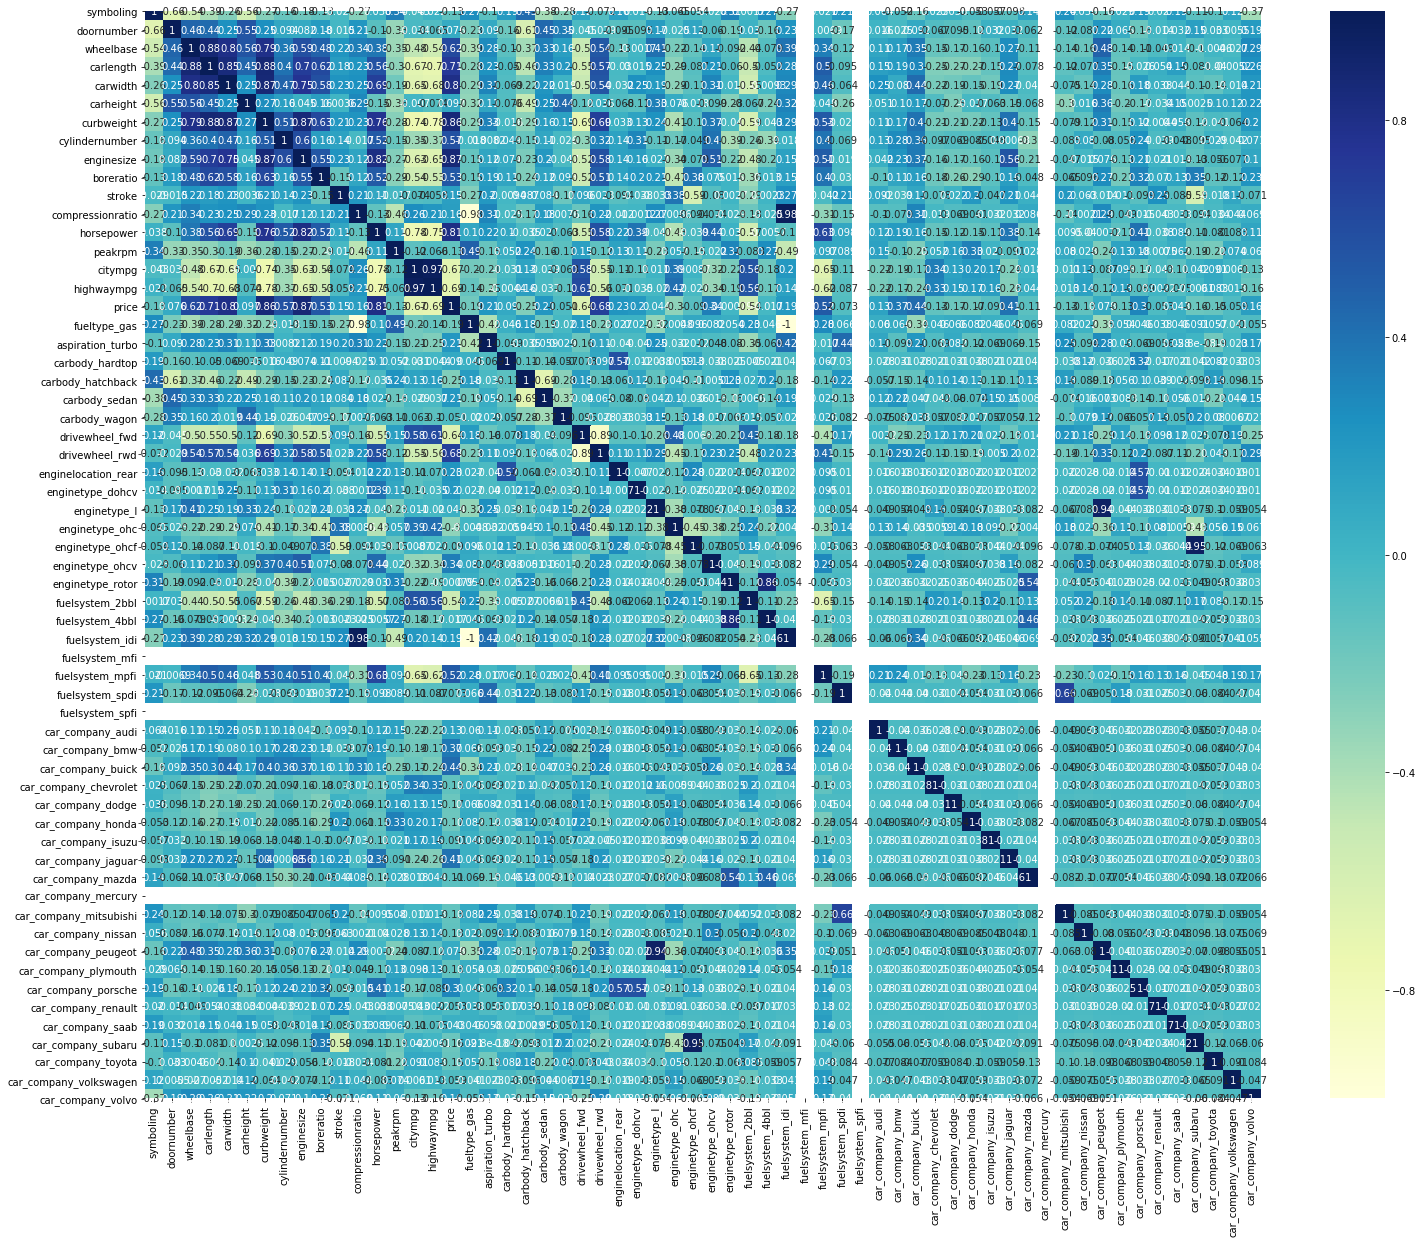

In [73]:
# again checking the correlation using heatmap

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

# Model Building 

In [74]:
y_train = df_train.pop('price')
X_train = df_train

# Model Building using RFE

In [75]:
lr = LinearRegression()
lr.fit(X_train,y_train)
# For selecting 15 columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [76]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 44),
 ('doornumber', False, 42),
 ('wheelbase', False, 17),
 ('carlength', False, 14),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', False, 13),
 ('cylindernumber', False, 37),
 ('enginesize', True, 1),
 ('boreratio', False, 30),
 ('stroke', False, 41),
 ('compressionratio', True, 1),
 ('horsepower', False, 33),
 ('peakrpm', False, 27),
 ('citympg', False, 26),
 ('highwaympg', False, 34),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 24),
 ('carbody_hardtop', False, 20),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 21),
 ('carbody_wagon', False, 25),
 ('drivewheel_fwd', False, 43),
 ('drivewheel_rwd', False, 35),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 31),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 29),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 38),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 36),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi'

In [77]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

# Model 1:

In [78]:
X1 = X_train[col]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

G:\PYTHON\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [79]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           4.59e-64
Time:                        18:09:22   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4776      0.162      2.940      0.004       0.156       0.799
carwidth                   0.4304      0.046      9.403      0.000       0.340       0.521
enginesize                 0.4790      0.045     10.594      0.000       0.390       0.568
compressionratio          -0.4505      0.162     -2.781      0.006      -0.771      -0.130
fueltype_gas              -0.6269      0.208     -3.016      0.003      -1.038      -0.216
enginelocation_rear        1.4894      0.211      7.071      0.000       1.073       1.906
enginetype_l               0.8983      0.307      2.921      0.004       0.290       1.507
enginetype_ohcf            0.6436      0.109      5.905      0.000       0.428       0.859
enginetype_rotor           0.9536      0.188      5.076      0.000       0.582       1.325
fuelsystem_idi             1.1045      0.369      2.995      0.003       0.375       1.834
car_company_bmw            1.0678      0.131      8.141      0.000       0.808       1.327
car_company_mazda         -0.2439      0.106     -2.299      0.023      -0.454      -0.034
car_company_mitsubishi    -0.3956      0.112     -3.517      0.001      -0.618      -0.173
car_company_peugeot       -1.4098      0.338     -4.171      0.000      -2.079      -0.741
car_company_renault       -0.6778      0.214     -3.173      0.002      -1.100      -0.255
car_company_subaru        -0.8458      0.122     -6.915      0.000      -1.088      -0.604
==============================================================================
Omnibus:                        8.408   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                9.825
Skew:                           0.399   Prob(JB):                      0.00735
Kurtosis:                       4.005   Cond. No.                     3.39e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All the p- values are significant. Let us check VIF.

In [80]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

G:\PYTHON\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


we see that there are few varialble which have infinite or large VIF. These variabl aren't of use but manually elimination is time consuming so lets build VIF for 10 columns

In [81]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)
# For selecting 10 columns
rfe2 = RFE(lr,10)
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [82]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('symboling', False, 49),
 ('doornumber', False, 47),
 ('wheelbase', False, 22),
 ('carlength', False, 19),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', False, 18),
 ('cylindernumber', False, 42),
 ('enginesize', True, 1),
 ('boreratio', False, 35),
 ('stroke', False, 46),
 ('compressionratio', False, 4),
 ('horsepower', False, 38),
 ('peakrpm', False, 32),
 ('citympg', False, 31),
 ('highwaympg', False, 39),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 29),
 ('carbody_hardtop', False, 25),
 ('carbody_hatchback', False, 20),
 ('carbody_sedan', False, 26),
 ('carbody_wagon', False, 30),
 ('drivewheel_fwd', False, 48),
 ('drivewheel_rwd', False, 40),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 36),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 34),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 43),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 41),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_id

In [83]:
col1 = X_train.columns[rfe2.support_]
col1

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

# Model 2:

In [84]:
X2 = X_train[col1]
X2_sm = sm.add_constant(X2)

lr_2 = sm.OLS(y_train,X2_sm).fit()

G:\PYTHON\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [85]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.98e-64
Time:                        18:09:23   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506      0.030     -1.675      0.096      -0.110       0.009
carwidth                0.4611      0.047      9.801      0.000       0.368       0.554
enginesize              0.4806      0.047     10.124      0.000       0.387       0.575
enginelocation_rear     1.4538      0.223      6.519      0.000       1.013       1.895
enginetype_l            0.9450      0.326      2.902      0.004       0.301       1.589
enginetype_ohcf         0.6553      0.115      5.678      0.000       0.427       0.884
enginetype_rotor        0.6927      0.172      4.029      0.000       0.353       1.033
car_company_bmw         1.1247      0.138      8.162      0.000       0.852       1.397
car_company_peugeot    -1.2582      0.354     -3.550      0.001      -1.959      -0.557
car_company_renault    -0.6256      0.226     -2.770      0.006      -1.072      -0.179
car_company_subaru     -0.7985      0.129     -6.192      0.000      -1.054      -0.543
==============================================================================
Omnibus:                        5.615   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.456
Skew:                           0.349   Prob(JB):                       0.0654
Kurtosis:                       3.655   Cond. No.                     4.69e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Model looks like as good so lets check the VIF

In [86]:
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

G:\PYTHON\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


There are some colums with high VIF so fisrtly we drop the column.
Here, we drop the car_company_subaru column. 

# Model 3:

In [87]:
# Deleting car_company_subaru column

X3 = X2.drop(['car_company_subaru'], axis =1)
X3_sm = sm.add_constant(X3)

lr_3 = sm.OLS(y_train,X3_sm).fit()

In [88]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           3.98e-64
Time:                        18:09:24   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506      0.030     -1.675      0.096      -0.110       0.009
carwidth                0.4611      0.047      9.801      0.000       0.368       0.554
enginesize              0.4806      0.047     10.124      0.000       0.387       0.575
enginelocation_rear     2.2524      0.346      6.518      0.000       1.569       2.936
enginetype_l            0.9450      0.326      2.902      0.004       0.301       1.589
enginetype_ohcf        -0.1433      0.101     -1.422      0.157      -0.343       0.056
enginetype_rotor        0.6927      0.172      4.029      0.000       0.353       1.033
car_company_bmw         1.1247      0.138      8.162      0.000       0.852       1.397
car_company_peugeot    -1.2582      0.354     -3.550      0.001      -1.959      -0.557
car_company_renault    -0.6256      0.226     -2.770      0.006      -1.072      -0.179
==============================================================================
Omnibus:                        5.615   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.456
Skew:                           0.349   Prob(JB):                       0.0654
Kurtosis:                       3.655   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


Lets drop the column  enginetype_ohcf  because its high p-value.

# Model 4: 

In [90]:
# Deleting enginetype_ohcf column

X4 = X3.drop(['enginetype_ohcf'], axis =1)
X4_sm = sm.add_constant(X4)

lr_4 = sm.OLS(y_train,X4_sm).fit()

In [91]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           8.22e-65
Time:                        18:09:24   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635      0.029     -2.195      0.030      -0.121      -0.006
carwidth                0.4596      0.047      9.735      0.000       0.366       0.553
enginesize              0.4870      0.047     10.264      0.000       0.393       0.581
enginelocation_rear     2.1107      0.332      6.355      0.000       1.454       2.768
enginetype_l            0.9641      0.327      2.952      0.004       0.318       1.610
enginetype_rotor        0.7137      0.172      4.151      0.000       0.374       1.054
car_company_bmw         1.1312      0.138      8.183      0.000       0.858       1.405
car_company_peugeot    -1.2647      0.356     -3.555      0.001      -1.968      -0.561
car_company_renault    -0.6133      0.227     -2.707      0.008      -1.061      -0.165
==============================================================================
Omnibus:                        5.533   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.168
Skew:                           0.374   Prob(JB):                       0.0755
Kurtosis:                       3.555   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


As we see, VIF of car_company_peugeot column still high so lets drop car_company_peugeot column and rebuild the Model.

# Model 5:

In [93]:
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

lr_5 = sm.OLS(y_train,X5_sm).fit()

In [94]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           2.49e-63
Time:                        18:09:24   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663      0.030     -2.198      0.030      -0.126      -0.007
carwidth                0.4115      0.047      8.729      0.000       0.318       0.505
enginesize              0.5101      0.049     10.415      0.000       0.413       0.607
enginelocation_rear     2.0560      0.346      5.946      0.000       1.372       2.740
enginetype_l           -0.1238      0.119     -1.040      0.300      -0.359       0.112
enginetype_rotor        0.7431      0.179      4.152      0.000       0.389       1.097
car_company_bmw         1.1269      0.144      7.822      0.000       0.842       1.412
car_company_renault    -0.5991      0.236     -2.538      0.012      -1.066      -0.132
==============================================================================
Omnibus:                       10.615   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.115
Skew:                           0.570   Prob(JB):                      0.00386
Kurtosis:                       3.752   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


p-value of enginetype_l is high so let us drop it.

# Model 6: 

In [96]:
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

lr_6 = sm.OLS(y_train,X6_sm).fit()

In [97]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           2.92e-64
Time:                        18:09:25   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748      0.029     -2.578      0.011      -0.132      -0.017
carwidth                0.3978      0.045      8.785      0.000       0.308       0.487
enginesize              0.5204      0.048     10.846      0.000       0.426       0.615
enginelocation_rear     2.0419      0.346      5.908      0.000       1.358       2.725
enginetype_rotor        0.7640      0.178      4.295      0.000       0.412       1.116
car_company_bmw         1.1294      0.144      7.838      0.000       0.844       1.414
car_company_renault    -0.5879      0.236     -2.492      0.014      -1.054      -0.121
==============================================================================
Omnibus:                        7.920   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.687
Skew:                           0.497   Prob(JB):                       0.0214
Kurtosis:                       3.549   Cond. No.                         16.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif 

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


All the p-value and VIF values seem to be in good range and R-Squared value is 89%. The Model explaining most of the variance without being to complex.

# Residual Analysis of Model

In [99]:
y_train_pred = lr_6.predict(X6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [100]:
res = y_train- y_train_pred

Text(0.5, 0, 'ERROR')

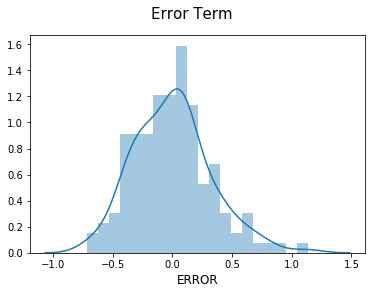

In [101]:
f = plt.figure()
sns.distplot(res, bins=20)
f.suptitle('Error Term', fontsize = 15)
plt.xlabel('ERROR', fontsize =12)

Error Term seem to be normally distributed so assumption of the linear regression modeling seems to be fulfilled/good. 

# Making Prediction and Evaluation

In [102]:
df_test[car_col_list] = scaler.transform(df_test[car_col_list])

G:\PYTHON\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
G:\PYTHON\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [103]:
# Dividing into X and Y

y_test = df_test.pop('price')
X_test = df_test

In [104]:
res_col = X6.columns

In [105]:
X_test_lr_6= X_test[res_col]
X_test_lr_6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [106]:
X_test_sm = sm.add_constant(X_test_lr_6)
y_pred = lr_6.predict(X_test_sm)
y_pred.head()

G:\PYTHON\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

In [107]:
# Evaluation of test by the comparision of y_test and y_pred

r2_score(y_test, y_pred)

0.8997211435182687

Text(0, 0.5, 'y_pred')

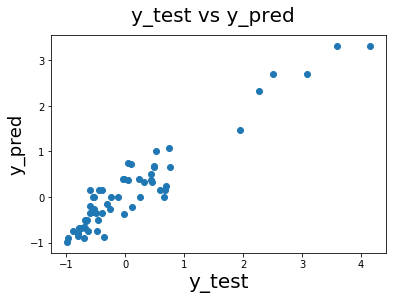

In [108]:
# Evaluation of the Model
# Plotting y_test and y_pred to understand the spread.

f = plt.figure()
plt.scatter(y_test,y_pred)
f.suptitle('y_test vs y_pred', fontsize=20) # Plot heading 
plt.xlabel('y_test', fontsize=20)# X-label
plt.ylabel('y_pred', fontsize=18)#y-label  

In [109]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sun, 13 Sep 2020   Prob (F-statistic):           2.92e-64
Time:                        18:09:27   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

CONCLUSION:
        1. R-squared and Adj. R-squared - (0.896 and 0.891)- 89% (Variance explained).
        2. F-statistic and Prob (F-statistic) - (195.2 and 2.92e-64), Model fit is significant and explained 89% variance is
           is just not by chance.
        3. p-values for all the coefficient seem to be less than the significance level 0.05. It mean that all the 
           predictions are statstically sigificant.
           

# These are the column(variable) that are significant in predicting the price of a car

    enginesize	
	carwidth	
	enginetype_rotor	
	car_company_bmw	
	enginelocation_rear	
	car_company_renault